In [353]:
import matplotlib
#%matplotlib inline
import subprocess
import argparse
from IPython.display import Image, display, Markdown, Latex
#from IPython.display import display
#from PIL import Image
# we import some useful methods from PyVOLCANS here
from pyvolcans.pyvolcans_func import get_volcano_number_from_name, format_volcano_name, _frac_to_float, set_weights_from_args

In [354]:
#user-defined parameter values to run PyVOLCANS
volcano = "Ruiz, Nevado del"
weights = '-Sz 0.1 -G 0.4 -M 0.15 -St 35/100'
#provided as a list (of a priori analogues)
apriori_analogues = ['Kelut','Concepcion','Kanlaon','Tolima, Nevado del']
other_options = '-w --plot_apriori -S' #without the flag `-S`, or `--save_figures`, the plots won't be displayed

#pre-processing steps before actually running the code (mostly for file-naming)
volcano_vnum = get_volcano_number_from_name(volcano)
volcano_printname = format_volcano_name(volcano,volcano_vnum)
weights_flags = ['-Ts','-G','-M','-Sz','-St']
numeric_weights =  []
split_weights = weights.split(' ')

for flag in weights_flags:
    try:
        index = split_weights.index(flag) + 1
        actual_weight = split_weights[index]
        numeric_weights.append(actual_weight)
    except ValueError:
        numeric_weights.append('0')

arg_weights = {'tectonic_setting': _frac_to_float(numeric_weights[0]),
               'geochemistry': _frac_to_float(numeric_weights[1]),
               'morphology': _frac_to_float(numeric_weights[2]),
               'eruption_size': _frac_to_float(numeric_weights[3]),
               'eruption_style': _frac_to_float(numeric_weights[4])}

new_weights = set_weights_from_args(arg_weights)
formatted_text = 'Ts{:.3f}G{:.3f}M{:.3f}Sz{:.3f}St{:.3f}'
new_weights_text = formatted_text.format(*new_weights.values()).replace('.', '')
#weights_printname = 'Ts0000G0600M0300Sz0100St0000' #this needs to be set up manually for now
weights_printname = new_weights_text

print(arg_weights)
print(new_weights_text)

{'tectonic_setting': 0.0, 'geochemistry': 0.4, 'morphology': 0.15, 'eruption_size': 0.1, 'eruption_style': 0.35}
Ts0000G0400M0150Sz0100St0350


In [355]:
print(apriori_analogues)
# Create list with arguments for subprocess.run
args=[]
args.append('pyvolcans')
args.append(volcano)
if weights:
    for i in weights.split():
        args.append(i)
if apriori_analogues:
    args.append("--apriori")
    for j in apriori_analogues:
        args.append(j)
if other_options:
    for k in other_options.split():
        args.append(k)
        
#args.append(options)
print(args)

['Kelut', 'Concepcion', 'Kanlaon', 'Tolima, Nevado del']
['pyvolcans', 'Ruiz, Nevado del', '-Sz', '0.1', '-G', '0.4', '-M', '0.15', '-St', '35/100', '--apriori', 'Kelut', 'Concepcion', 'Kanlaon', 'Tolima, Nevado del', '-w', '--plot_apriori', '-S']


In [356]:
output = subprocess.run(args, capture_output=True)

In [357]:
# use decode function to convert to string
print(output.stderr.decode("utf-8"))
print('Output:',output.stdout.decode("utf-8"))


Output: 
Top 10 analogue volcanoes for Ruiz, Nevado del, Colombia (351020):
               name       country  smithsonian_id  total_analogy
   Guagua Pichincha       Ecuador          352020       0.970208
            Hakusan         Japan          283050       0.948448
          Sabancaya          Peru          354006       0.946164
            Bulusan   Philippines          273010       0.941919
           Yakedake         Japan          283070       0.940911
 Kusatsu-Shiranesan         Japan          283120       0.938250
            Rainier United States          321030       0.936655
               Hood United States          322010       0.936615
           Sinabung     Indonesia          261080       0.936260
Tandikat-Singgalang     Indonesia          261150       0.933550


According to PyVOLCANS, the following percentage of volcanoes in the GVP database
are better analogues to Ruiz, Nevado del than the 'a priori' analogues reported below:

Kelut (263280): 21%

Concepcion (344

In [358]:
# print the plots for the apriori analogues inline using Markdown
##apriori_figure = r"Nisyros_212050_apriori_analogues_Ts0200G0200M0200Sz0200St0200.png"
##markdown = '''''
##A | B
##- | - 
##![alt](Nisyros_212050_apriori_analogues_Ts0200G0200M0200Sz0200St0200.png) | ![alt](Nisyros_212050_better_analogues_Ts0200G0200M0200Sz0200St0200.png)
##'''
#print(markdown)
##display(Markdown(markdown))

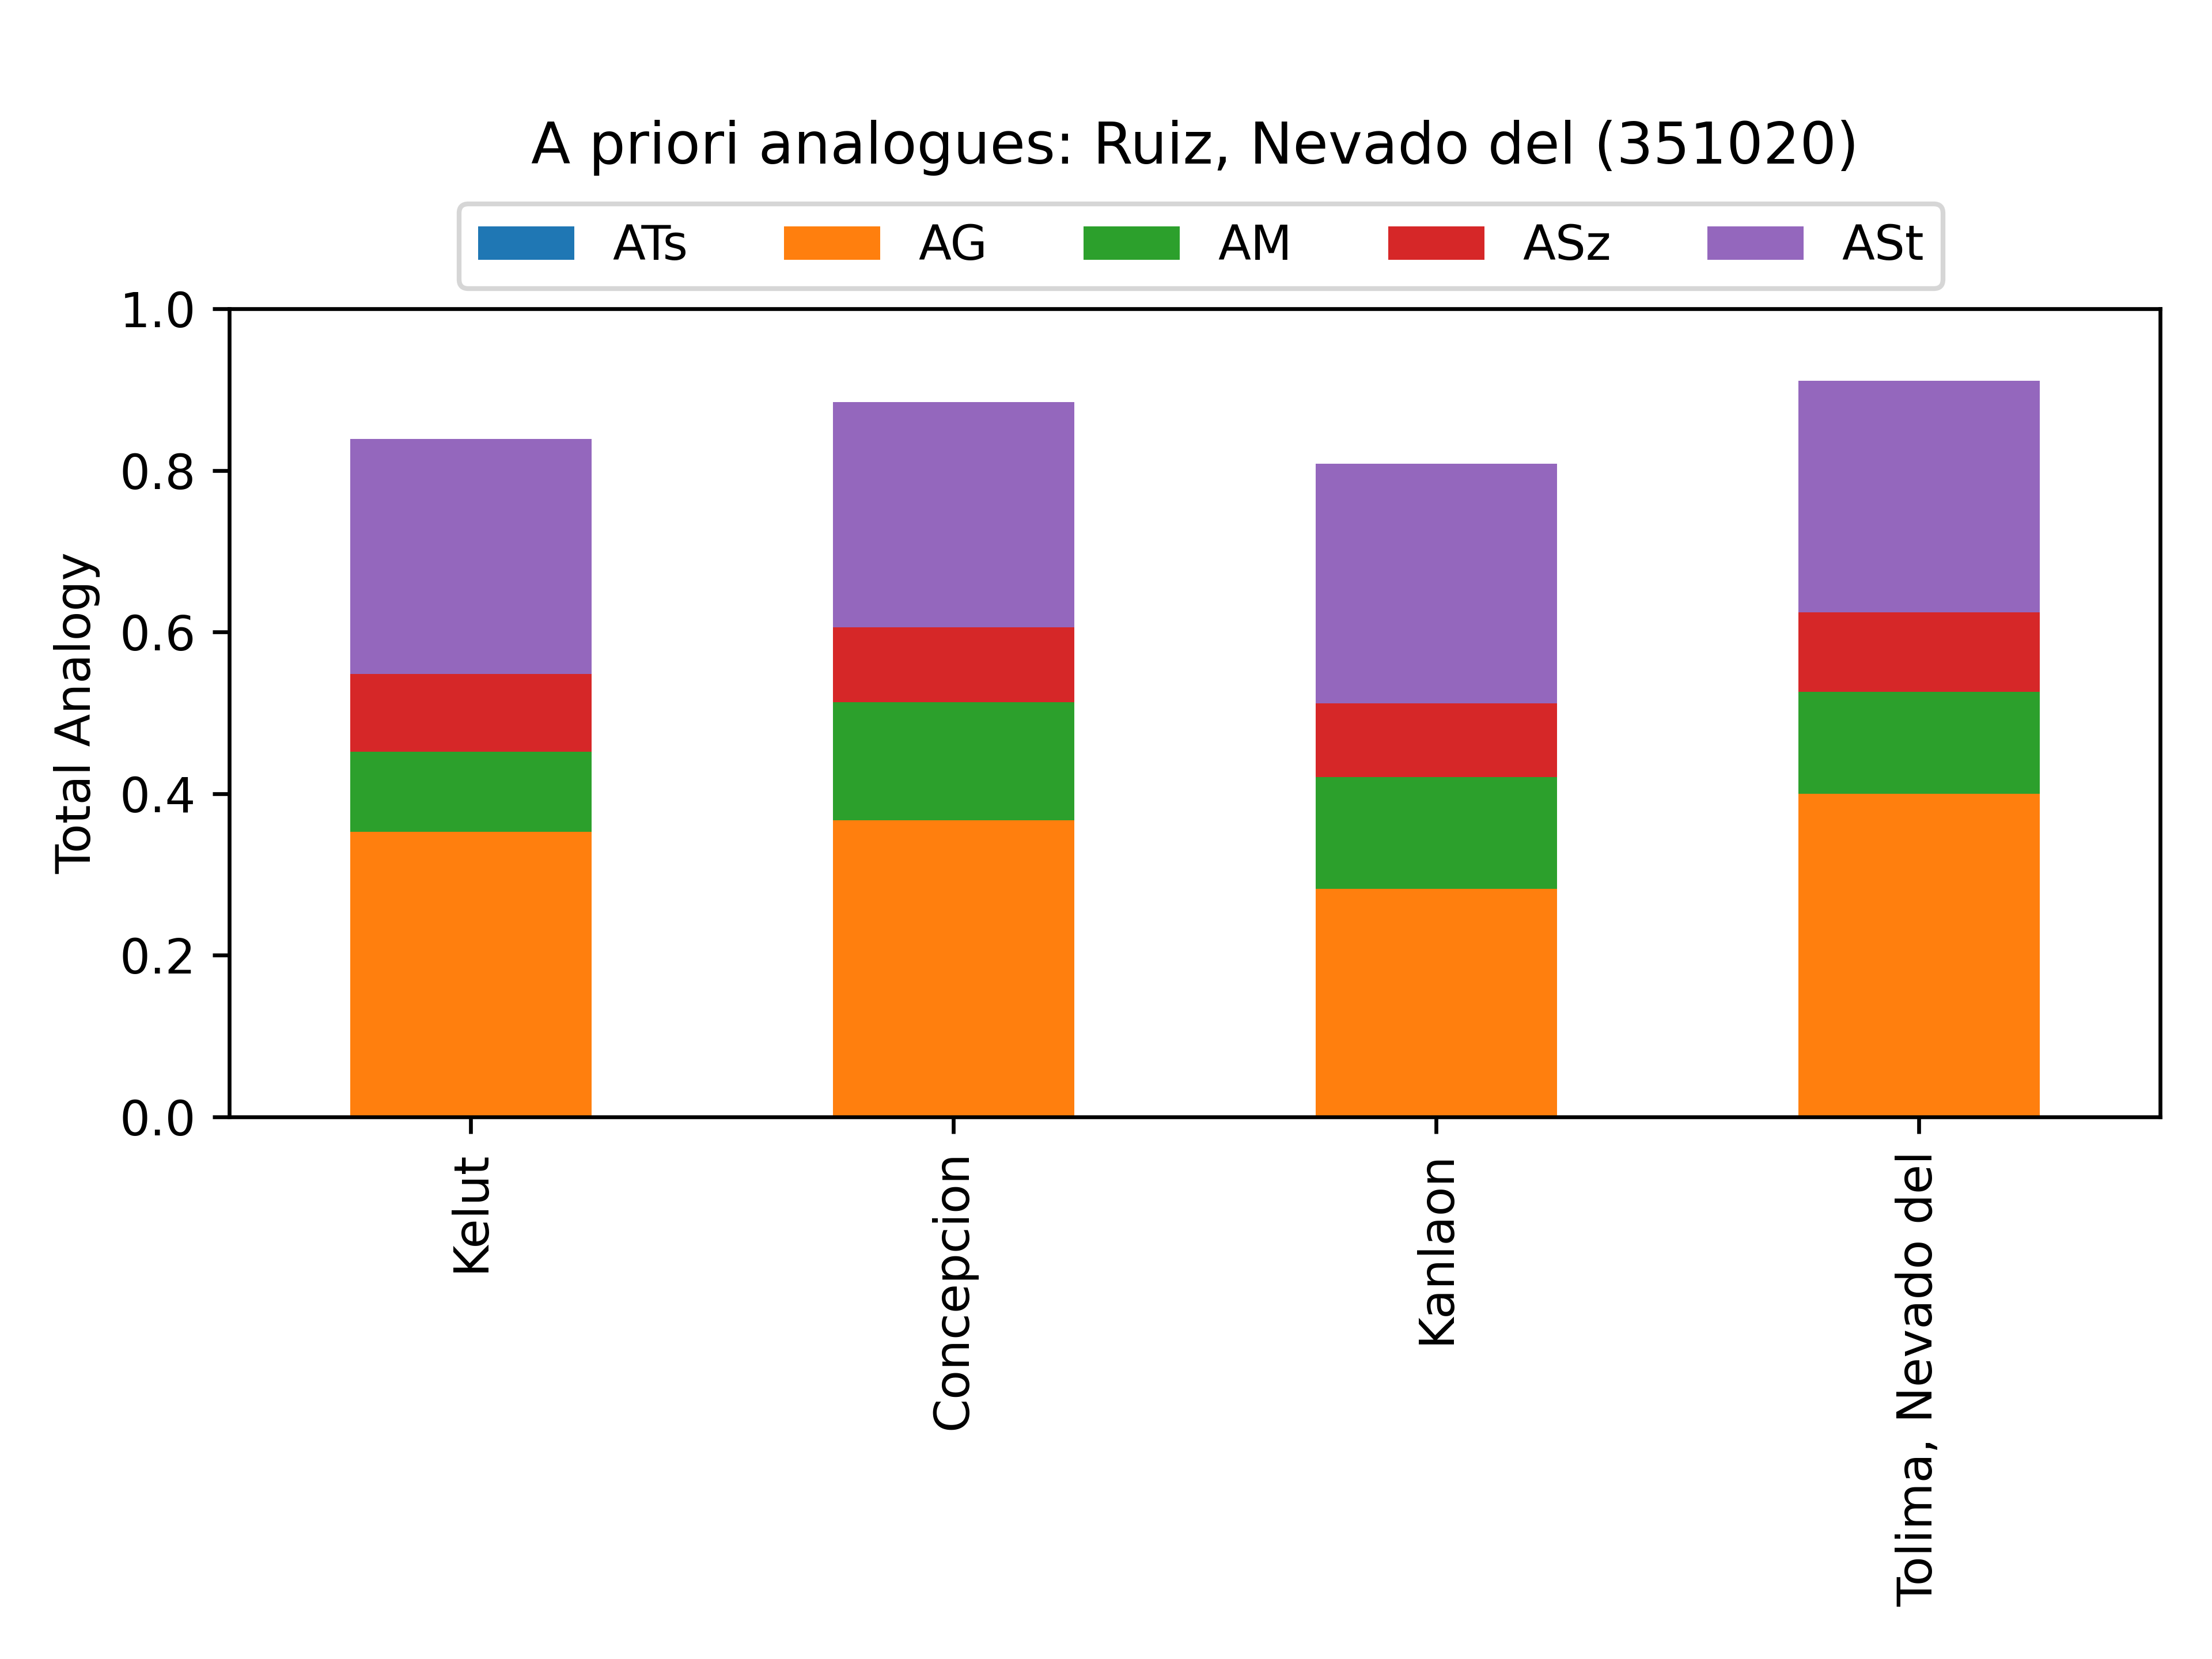

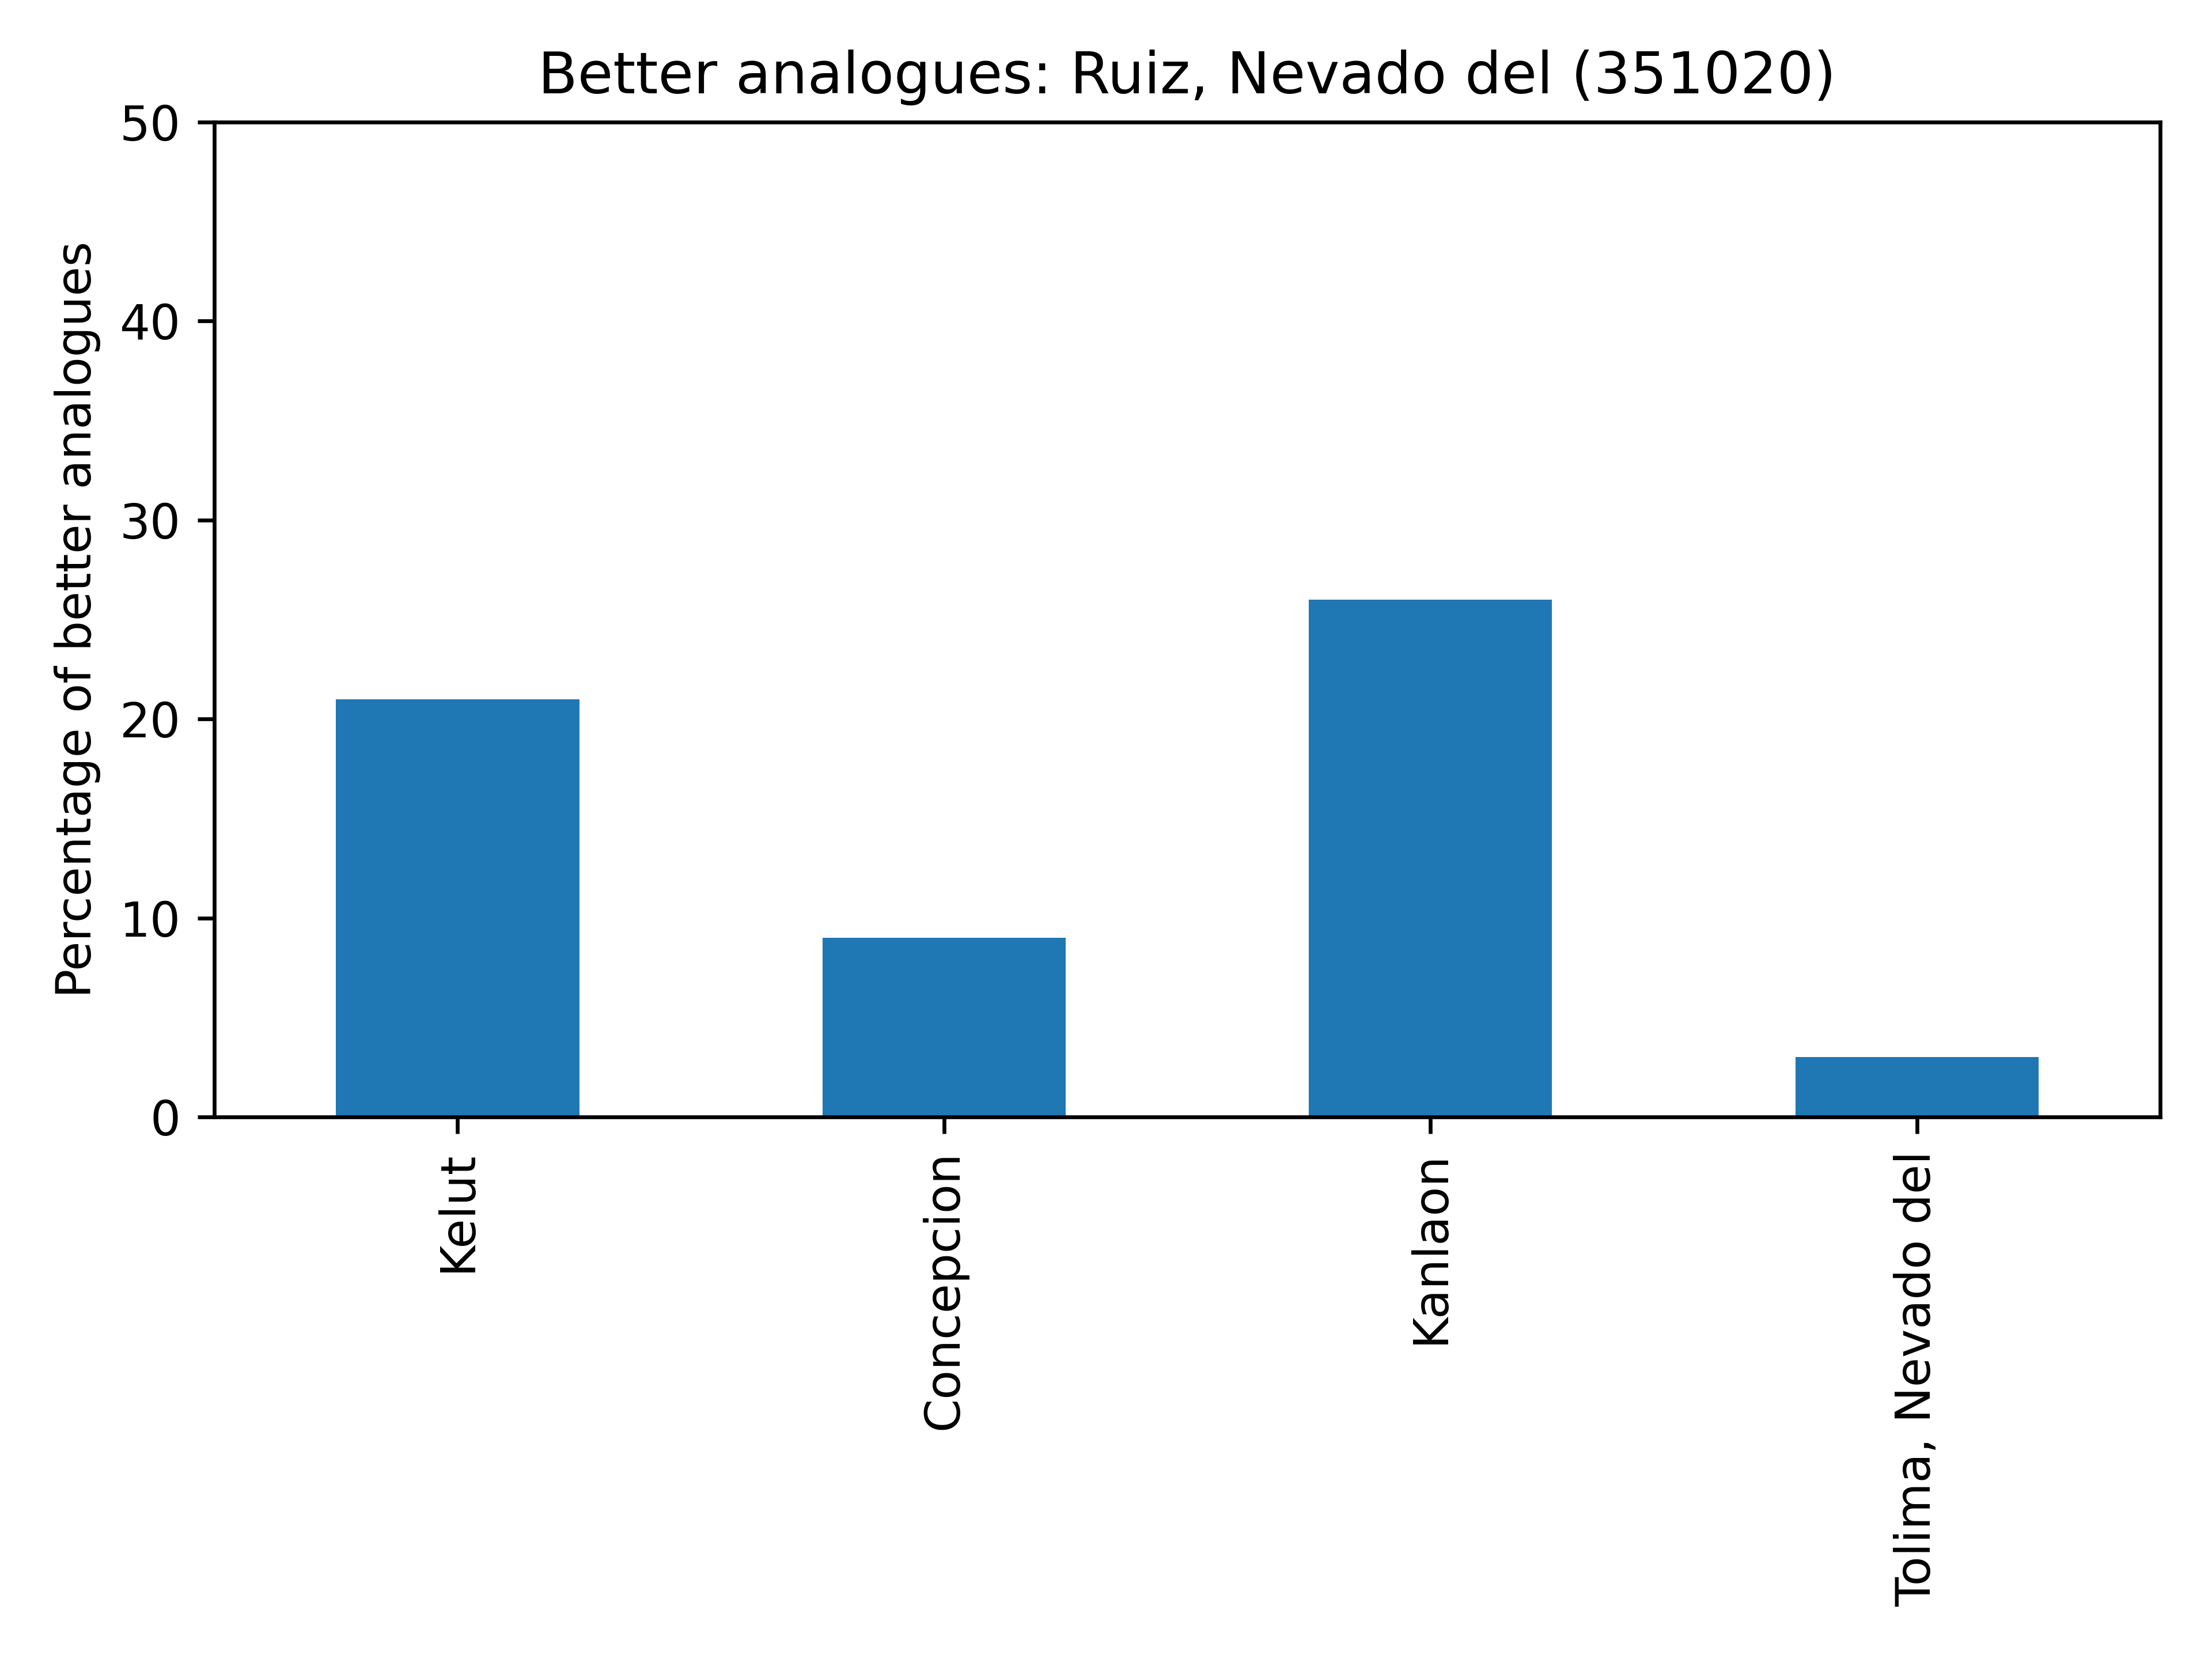

In [359]:
#plot graphs only if '--save_figures'/'-S' option has been chosen for now
other_options_split = other_options.split(' ')
test = set(other_options_split).intersection(set(['--save_figures', '-S']))
if bool(test) == True and output.stdout: #do not plot 'old' figures if the PyVOLCANS has resulted in an error
    #path_apriori=r"Nisyros_212050_apriori_analogues_Ts0200G0200M0200Sz0200St0200.png"
    path_apriori = (f"{volcano_printname}_apriori_analogues_{weights_printname}.png")
    display(Image(path_apriori, width=500, height = 300))
    #path_better=r"Nisyros_212050_better_analogues_Ts0200G0200M0200Sz0200St0200.png"
    path_better = (f"{volcano_printname}_better_analogues_{weights_printname}.png")
    display(Image(path_better, width=500, height = 300))

#save_figs_selected = other_options_split.index('--save_figures' or '-S')
#print(save_figs_selected)
#print(test2)

In [ ]:
#load csv file to get a Pandas df